<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part4/P4_Ch04_CH04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch import

In [1]:
import torch
print(torch.__version__)

1.13.1+cu116


# Pytorch 맛보기

In [2]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np


In [3]:
## MNIST Data down 받기
training_data = datasets.MNIST(
    root='data',
    train=True,
    download =True,
    transform=ToTensor(),
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
batch_size =64
#데이터 로더 생성
train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
  print('Shape of X [N ,C, H, W]: ', X.shape)
  print('Shape of y: ', y.shape, y.dtype)
  break

Shape of X [N ,C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [5]:
#학습에 사용할 장치 지정
device = 'cuda ' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

#모델정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits
model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [6]:
# Loss 함수와 Optimizer 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [7]:
#Training을 위한 함수
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    #예측오류 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    #역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 ==0:
      loss, current = loss.item(), batch * len(X)
      print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')
  


In [11]:
#Test를 위한 함수
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss +=loss_fn(pred, y).item()
      correct +=(pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /=num_batches
  correct /=size
  print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

In [12]:
epochs = 10
for t in range(epochs):
  print(f'Epoch {t+1}\n--------------------------')
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
print('Done!')

Epoch 1
--------------------------
loss: 0.149430 [    0/60000]
loss: 0.200803 [ 6400/60000]
loss: 0.105593 [12800/60000]
loss: 0.193634 [19200/60000]
loss: 0.154590 [25600/60000]
loss: 0.249080 [32000/60000]
loss: 0.066091 [38400/60000]
loss: 0.225364 [44800/60000]
loss: 0.181448 [51200/60000]
loss: 0.195000 [57600/60000]
Test Error: 
 Accuracy: 96.1%, Avg loss: 0.129074 

Epoch 2
--------------------------
loss: 0.092902 [    0/60000]
loss: 0.133901 [ 6400/60000]
loss: 0.079868 [12800/60000]
loss: 0.088130 [19200/60000]
loss: 0.105128 [25600/60000]
loss: 0.200562 [32000/60000]
loss: 0.049811 [38400/60000]
loss: 0.181150 [44800/60000]
loss: 0.137267 [51200/60000]
loss: 0.151029 [57600/60000]
Test Error: 
 Accuracy: 96.7%, Avg loss: 0.106099 

Epoch 3
--------------------------
loss: 0.073802 [    0/60000]
loss: 0.105158 [ 6400/60000]
loss: 0.063710 [12800/60000]
loss: 0.036074 [19200/60000]
loss: 0.076575 [25600/60000]
loss: 0.156103 [32000/60000]
loss: 0.046424 [38400/60000]
loss: 0.

## 내가 쓴 글씨로 테스트

In [13]:
import os
from PIL import Image
from google.colab import files

uploaded =files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])
  ))

Saving image.png to image.png
User uploaded file "image.png" with length 431 bytes


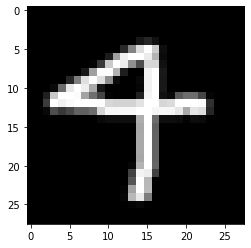

(28, 28)


In [15]:
from math import e
# image 파일의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
#img file읽기
cur_img = Image.open(img_path)
#28*28로 resize
cur_img = cur_img.resize((28,28))
image =np.asarray(cur_img)

# color image일 경우 RGB평균값으로 gray sclae로 변경
try:
  image = np.mean(image, axis = 2)
except:
  pass

# upload한 image는 흰 배경에 검은글씨이고 , MNIST데이터와 같이 검은 배경에 흰글씨로 변경
image = np.abs(255-image)
# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image, cmap = 'gray')
plt.show()
print(image.shape)

In [16]:
image = torch.as_tensor(image).to(device).reshape(1,1,28,28)
model.eval()
predict = model(image)
print('Model이 예측한 값은 {} 입니다.'.format(predict.argmax(1).item()))

Model이 예측한 값은 9 입니다.


# Tensor
텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)합니다.

In [17]:
# list로 부터 직접 tesor 생성
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [19]:
#numpy array로 부터 tensor생성
np_array = np.array(data)
x_np_1 = torch.tensor(np_array)
print(x_np_1)

tensor([[1, 2],
        [3, 4]])


In [20]:
x_np_2 = torch.as_tensor(np_array)
print(x_np_2)

tensor([[1, 2],
        [3, 4]])


In [21]:
x_np_3 = torch.from_numpy(np_array)
x_np_3

tensor([[1, 2],
        [3, 4]])

In [22]:
x_np_1[0,0] = 5
print(x_np_1)
print(np_array)

tensor([[5, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [23]:
x_np_2[0,0] = 6
print(x_np_2)
print(np_array)

tensor([[6, 2],
        [3, 4]])
[[6 2]
 [3 4]]


In [24]:
x_np_3[0,0] =7
print(x_np_3)
print(np_array)

tensor([[7, 2],
        [3, 4]])
[[7 2]
 [3 4]]


In [25]:
np_again = x_np_1.numpy()
print(np_again, type(np_again))

[[5 2]
 [3 4]] <class 'numpy.ndarray'>


In [26]:
a = torch.ones(2,3)
b = torch.zeros(2,3)
c = torch.full((2,3),2)
d = torch.empty(2,3)
print(a)
print(b)
print(c)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[1.7984e+20, 4.5828e-41, 1.3150e-34],
        [0.0000e+00, 2.2421e-44, 0.0000e+00]])


In [28]:
i = torch.eye(3)
print(i)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [29]:
j = torch.arange(10)
print(j)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [30]:
k = torch.rand(2,2)
l = torch.randn(2,2)
print(k)
print(l)

tensor([[0.1549, 0.0775],
        [0.9974, 0.1760]])
tensor([[ 0.0739, -1.8534],
        [-0.9155, -0.3889]])


## Tensor의 속성

In [31]:
tensor = torch.rand(3,4)
print(f'Shape of tensor:{tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on: {tensor.device}')

Shape of tensor:torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [32]:
# 속성 변경
tensor = tensor.reshape(4,3)
tensor = tensor.int()
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on: {tensor.device}')

Shape of tensor: torch.Size([4, 3])
Datatype of tensor: torch.int32
Device tensor is stored on: cpu


## indexing 과 slicing

In [33]:
a = torch.arange(1,13).reshape(3,4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [38]:
#indexing
print(a[1])
print(a[0,-1])

tensor([5, 6, 7, 8])
tensor(4)


In [39]:
#slicing
print(a[1:-1])
print(a[:2, 2:])

tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


## Transpose

In [40]:
a = torch.arange(16).reshape(2,2,4)
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


In [41]:
b = a.transpose(1,2)
print(b, b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


In [42]:
c = a.permute((2,0,1))
print(c, c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


## Tensor 연산

In [43]:
x = torch.tensor([[1,2],[3,4]], dtype = torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype = torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [48]:
print(x+y)
print(x-y)
print(x*y)
print(x/y)
print('='*30)
print(torch.add(x, y))
print(torch.subtract(x,y))
print(torch.multiply(x,y))
print(torch.divide(x,y))
print(torch.matmul(x,y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [52]:
# in-place 연산

print(x.add(y))
print(x)
print(x.add_(y))
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [ ]:
# 객체.ctrl+space -> 쓸 수 있는 함수 보여줌
x.

In [54]:
z = torch.arange(1,11).reshape(2,5)
print(z)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


In [55]:
sum1 = torch.sum(z, axis = 0)
sum2 = torch.sum(z, axis = 1)
sum3 = torch.sum(z, axis = -1)
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)

tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [58]:
a = torch.arange(24).reshape(4,6)
b = a.clone().detach()
print(a, a.shape)
print(b, b.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])


In [59]:
c = torch.cat([a,b], axis = 0)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([8, 6])


In [60]:
c = torch.cat([a,b], axis = -1)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23]]) torch.Size([4, 12])


In [61]:
d = torch.stack([a,b], axis = 0)
print(d, d.shape)
# stack은 axis = 부분에 새로운 축 추가

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]],

        [[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]]]) torch.Size([2, 4, 6])


In [62]:
d = torch.stack([a,b], axis = -1)
print(d, d.shape)

tensor([[[ 0,  0],
         [ 1,  1],
         [ 2,  2],
         [ 3,  3],
         [ 4,  4],
         [ 5,  5]],

        [[ 6,  6],
         [ 7,  7],
         [ 8,  8],
         [ 9,  9],
         [10, 10],
         [11, 11]],

        [[12, 12],
         [13, 13],
         [14, 14],
         [15, 15],
         [16, 16],
         [17, 17]],

        [[18, 18],
         [19, 19],
         [20, 20],
         [21, 21],
         [22, 22],
         [23, 23]]]) torch.Size([4, 6, 2])
